In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [11]:
def load_results(results_folder):
    dfs = {}
    folders = os.listdir(results_folder)

    for f in folders:
        fsplit = f.split("_")
        lvl = fsplit[2]
        n1 = fsplit[3]
        n2 = fsplit[4]


        contents = os.listdir(results_folder + "/" + f)
        if 'simulation_results' in contents:
            c2 = os.listdir(results_folder + "/" + f + "/" + "simulation_results")
            for c in c2:
                if c.endswith('.csv'):
                    df = pd.read_csv(results_folder + "/" + f + "/" + "simulation_results" + "/" + c)

                    dfs[(int(lvl), int(n1), int(n2))] = df

    return dfs

In [18]:
dfs_cbs = load_results('results2')
dfs_prio = load_results('results_prioritized_2')
dfs_dist_2 = load_results('results_distributed_2')
dfs_dist_4 = load_results('results_distributed_4')
dfs_dist_6 = load_results('results_distributed_6')

In [230]:
sum_compute = 0.0
n = 0

for dfs in [dfs_cbs, dfs_prio, dfs_dist_2, dfs_dist_4, dfs_dist_6]:
    for k in dfs.keys():
        sum_compute += dfs[k]['Computation time'].sum()
        n += dfs[k].size

print(f'{sum_compute / 60 / 60} hours')
print(n)

51.8113197536564 hours
6143274


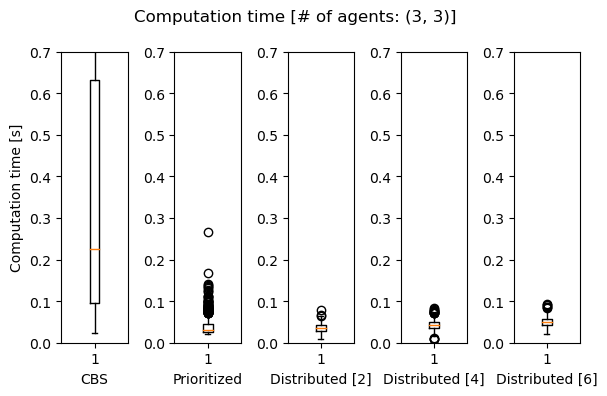

In [221]:
ymin = 0
ymax = .7

samples = []

plt.figure(figsize=(6, 4))
plt.subplot(151)
plt.boxplot(dfs_cbs[(2, 3, 3)]["Computation time"].dropna())
samples.append(dfs_cbs[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.ylabel('Computation time [s]')
plt.xlabel('CBS')

plt.subplot(152)
plt.boxplot(dfs_prio[(2, 3, 3)]["Computation time"].dropna())
samples.append(dfs_prio[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Prioritized')

plt.subplot(153)
plt.boxplot(dfs_dist_2[(2, 3, 3)]["Computation time"].dropna())
samples.append(dfs_dist_2[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [2]')

plt.subplot(154)
plt.boxplot(dfs_dist_4[(2, 3, 3)]["Computation time"].dropna())
samples.append(dfs_dist_4[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [4]')

plt.subplot(155)
plt.boxplot(dfs_dist_6[(2, 3, 3)]["Computation time"].dropna())
samples.append(dfs_dist_6[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [6]')

plt.suptitle('Computation time [# of agents: (3, 3)]')
plt.tight_layout()
plt.savefig('barplot_compute_3_3.pdf')

In [218]:
from scipy.stats import ttest_ind

In [236]:
for i in range(len(samples)):
    for j in range(i, len(samples)):
        (stat, pvalue) = ttest_ind(samples[i], samples[j])
        print(i, j, f'{pvalue:.2e}')

0 0 1.00e+00
0 1 6.06e-97
0 2 0.00e+00
0 3 0.00e+00
0 4 5.32e-300
1 1 1.00e+00
1 2 0.00e+00
1 3 0.00e+00
1 4 3.01e-174
2 2 1.00e+00
2 3 4.34e-52
2 4 2.54e-94
3 3 1.00e+00
3 4 1.01e-37
4 4 1.00e+00


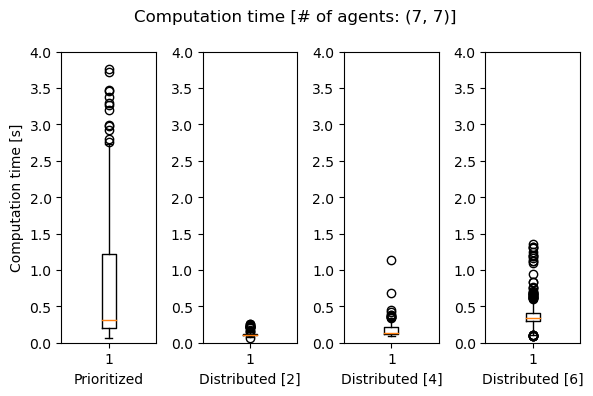

In [231]:
ymin = 0
ymax = 4
samples = []
plt.figure(figsize=(6, 4))

plt.subplot(141)
plt.boxplot(dfs_prio[(2, 7, 7)]["Computation time"].dropna())
samples.append(dfs_prio[(2, 7, 7)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Prioritized')
plt.ylabel('Computation time [s]')

plt.subplot(142)
plt.boxplot(dfs_dist_2[(2, 7, 7)]["Computation time"].dropna())
samples.append(dfs_dist_2[(2, 7, 7)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [2]')

plt.subplot(143)
plt.boxplot(dfs_dist_4[(2, 7, 7)]["Computation time"].dropna())
samples.append(dfs_dist_4[(2, 7, 7)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [4]')

plt.subplot(144)
plt.boxplot(dfs_dist_6[(2, 7, 7)]["Computation time"].dropna())
samples.append(dfs_dist_6[(2, 7, 7)]["Computation time"].dropna())
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [6]')

plt.suptitle('Computation time [# of agents: (7, 7)]')
plt.tight_layout()
plt.savefig('barplot_compute_7_7.pdf')

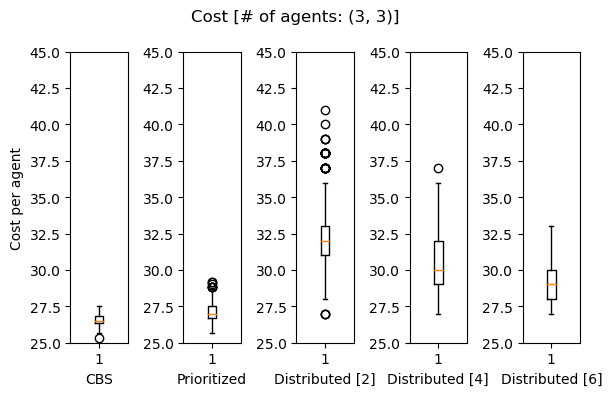

In [235]:
ymin = 25
ymax = 45
samples = []
plt.figure(figsize=(6, 4))

plt.subplot(151)
plt.boxplot(dfs_cbs[(2, 3, 3)]["Cost"].dropna() / 6)
samples.append(dfs_cbs[(2, 3, 3)]["Cost"].dropna() / 6)
plt.ylim(ymin, ymax)
plt.xlabel('CBS')
plt.ylabel('Cost per agent')

plt.subplot(152)
plt.boxplot(dfs_prio[(2, 3, 3)]["Cost"].dropna() / 6)
samples.append(dfs_prio[(2, 3, 3)]["Cost"].dropna() / 6)
plt.ylim(ymin, ymax)
plt.xlabel('Prioritized')


plt.subplot(153)
plt.boxplot(dfs_dist_2[(2, 3, 3)]["Cost"].dropna() / 6)
samples.append(dfs_dist_2[(2, 3, 3)]["Cost"].dropna() / 6)
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [2]')

plt.subplot(154)
plt.boxplot(dfs_dist_4[(2, 3, 3)]["Cost"].dropna() / 6)
samples.append(dfs_dist_4[(2, 3, 3)]["Cost"].dropna() / 6)
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [4]')

plt.subplot(155)
plt.boxplot(dfs_dist_6[(2, 3, 3)]["Cost"].dropna() / 6)
samples.append(dfs_dist_6[(2, 3, 3)]["Cost"].dropna() / 6)
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [6]')

plt.suptitle('Cost [# of agents: (3, 3)]')
plt.tight_layout()
plt.savefig('barplot_cost_3_3.pdf')

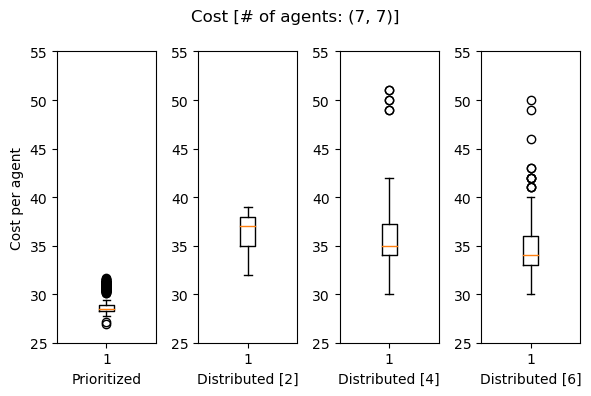

In [237]:
ymin = 25
ymax = 55
samples = []
plt.figure(figsize=(6, 4))

plt.subplot(141)
plt.boxplot(dfs_prio[(2, 7, 7)]["Cost"].dropna() / 14)
samples.append(dfs_prio[(2, 7, 7)]["Cost"].dropna() / 14)
plt.ylim(ymin, ymax)
plt.xlabel('Prioritized')
plt.ylabel('Cost per agent')

plt.subplot(142)
plt.boxplot(dfs_dist_2[(2, 7, 7)]["Cost"].dropna() / 14)
samples.append(dfs_dist_2[(2, 7, 7)]["Cost"].dropna() / 14)
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [2]')

plt.subplot(143)
plt.boxplot(dfs_dist_4[(2, 7, 7)]["Cost"].dropna() / 14)
samples.append(dfs_dist_4[(2, 7, 7)]["Cost"].dropna() / 14)
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [4]')

plt.subplot(144)
plt.boxplot(dfs_dist_6[(2, 7, 7)]["Cost"].dropna() / 14)
samples.append(dfs_dist_6[(2, 7, 7)]["Cost"].dropna() / 14)
plt.ylim(ymin, ymax)
plt.xlabel('Distributed [6]')

plt.suptitle('Cost [# of agents: (7, 7)]')
plt.tight_layout()
plt.savefig('barplot_cost_7_7.pdf')

In [144]:
def get_vals(lvl, variable, func, dfs):

    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    y = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    X, Y = np.meshgrid(x, y)

    Z = []


    for xxyy in zip(X, Y):
        zz = []
        for i in range(len(xxyy[0])):
            x = xxyy[0][i]
            y = xxyy[1][i]

            try:

                if y > x:
                    if variable == 'Cost':
                        m = func(dfs[(lvl, x, y)][variable].dropna() / (x + y))
                    elif variable == 'nan':
                        # print('mmmmmmmmmmm')
                        m = (dfs[(lvl, x, y)]['Cost'].isna() * 1).mean()
                        # print(m)
                    else:
                        m = func(dfs[(lvl, x, y)][variable].dropna())
                else:
                    if variable == 'Cost':
                        m = func(dfs[(lvl, y, x)][variable].dropna() / (x + y))
                    elif variable == 'nan':
                        m = (dfs[(lvl, y, x)]['Cost'].isna() * 1).mean()
                    else:
                        m = func(dfs[(lvl, y, x)][variable].dropna())

            except KeyError:
                if variable == 'nan':
                    m = 1.0
                else:
                    m = np.nan

            zz.append(m)
        
        Z.append(zz)

    Z = np.array(Z)

    return X, Y, Z


TypeError: get_vals() missing 1 required positional argument: 'func'

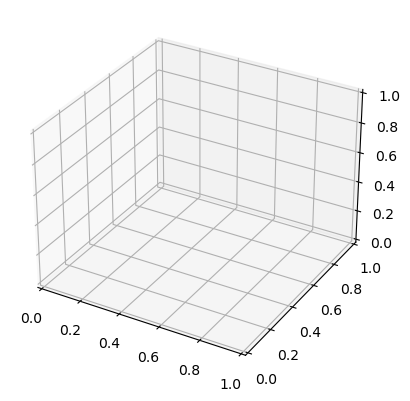

In [5]:
ax = plt.axes(projection='3d')
#ax.zaxis._set_scale('log')m = dfs[(lvl, x, y)][variable].isna().sum() / dfs[(lvl, x, y)][variable].size
X, Y, Z = get_vals(2, 'Cost')
ax.plot_surface(X, Y, Z, cmap='viridis')

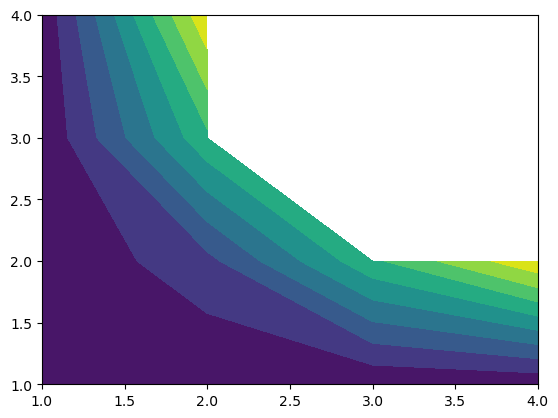

In [125]:
ax = plt.axes()
ax.contourf(X, Y, Z, levels=10)

In [123]:
def fraction_nan(a):
    return a

0.010926317567431874 32.23194327866665
0.0022895097000861803 4.945985432190863
0.0022895097000861803 4.945985432190863
0.0022895097000861803 4.945985432190863
0.0022895097000861803 4.945985432190863


/tmp/ipykernel_746622/3616893430.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.006421127469965272 70.97877116346305
0.0006774708680816159 2.567780406215494
0.0006774708680816159 2.567780406215494
0.0006774708680816159 2.567780406215494
0.0006774708680816159 2.567780406215494


/tmp/ipykernel_746622/3616893430.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664


/tmp/ipykernel_746622/3616893430.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036


/tmp/ipykernel_746622/3616893430.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0 1.3784020367475076
0 1.3784020367475076
0 1.3784020367475076
0 1.3784020367475076
0 1.3784020367475076


/tmp/ipykernel_746622/3616893430.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


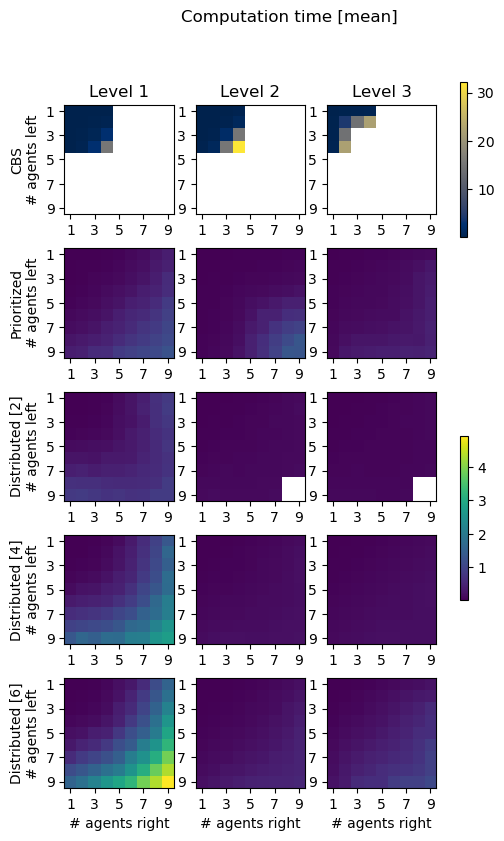

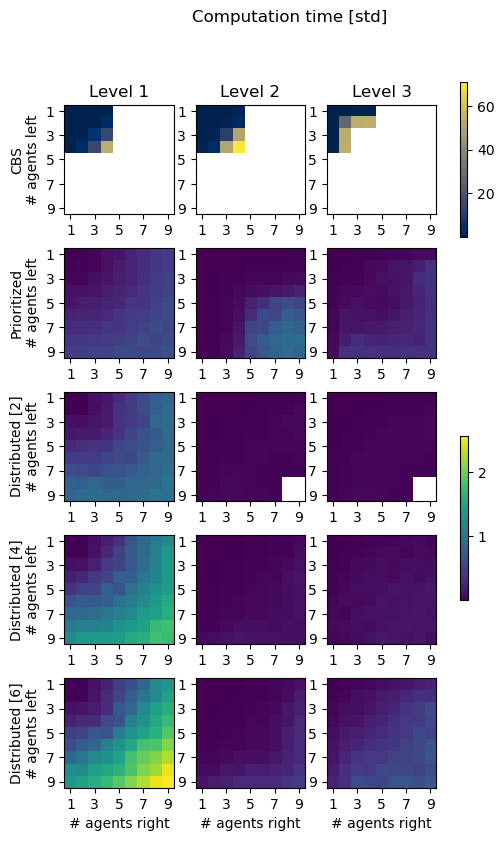

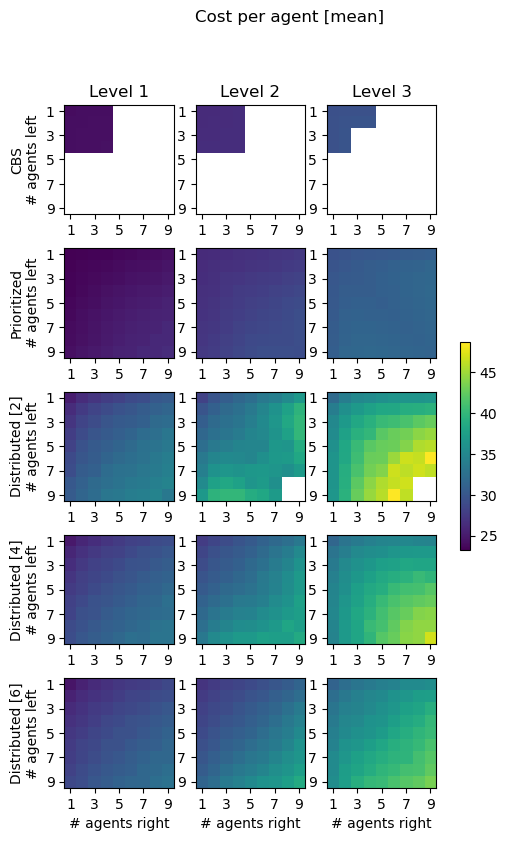

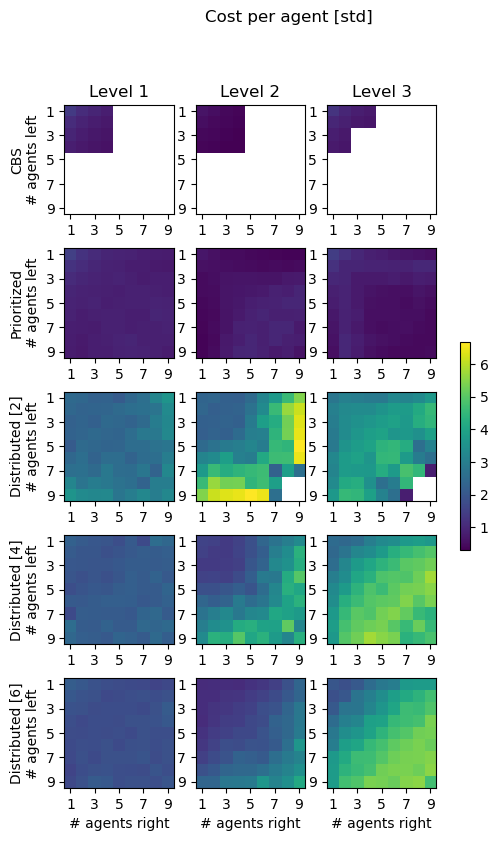

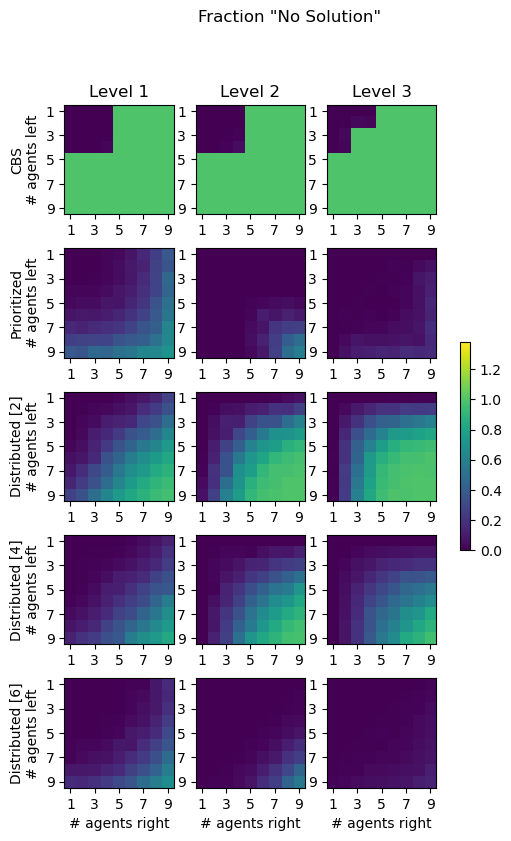

In [152]:
algs = [dfs_cbs, dfs_prio, dfs_dist_2, dfs_dist_4, dfs_dist_6]
algs_names = ['CBS', 'Prioritized', 'Distributed [2]', 'Distributed [4]', 'Distributed [6]']



for i, v in enumerate([('Computation time', 1.5, np.mean), ('Computation time', 60, np.std), ('Cost', 600, np.mean), ('Cost', 5, np.std), ('nan', 0,fraction_nan)]):
    fig, axs = plt.subplots(len(algs), 3, figsize=(6, 9))
    
    mean_or_std = {
        np.mean: "[mean]",
        np.std: "[std]",
        fraction_nan: '[fraction]'
    }

    if v[2] == fraction_nan:
        title = 'Fraction "No Solution"'
    elif v[0] == 'Cost':
        title = f'Cost per agent {mean_or_std[v[2]]}'
    else:
        title = f'{v[0]} {mean_or_std[v[2]]}'

    fig.suptitle(title)

    if v[2] == fraction_nan:
        _vmin = 0
        _vmax = 1
    else:
        _vmin = np.nanmin([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[1:]])
        _vmax = np.nanmax([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[1:]])

        _vmin_cbs = np.nanmin([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[:1]])
        _vmax_cbs = np.nanmax([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[:1]])
    
    for j, dfs in enumerate(algs):

        colormap = 'viridis'

        if j == 0 and i in [0, 1]:
            vmin = _vmin_cbs
            vmax = _vmax_cbs

            colormap = 'cividis'
        elif i in [0, 1]:
            vmin = _vmin
            vmax = _vmax
        else:
            vmin = min(_vmin, _vmin_cbs)
            vmax = max(_vmax, _vmax_cbs)

        if v[2] == fraction_nan:
            _vmin = 0
            _vmax = 1

        print(vmin, vmax)
        for lvl in [1, 2, 3]:
            ax = axs[j,lvl - 1]
            im = ax.imshow(get_vals(lvl, v[0], v[2], dfs=dfs)[2], vmin=vmin, vmax=vmax, cmap=colormap)
            if colormap == 'cividis':
                pmap = im
            
            ax.set_xticks([0, 2, 4, 6, 8])
            ax.set_xticklabels([str(a) for a in [1, 3, 5, 7, 9]])

            ax.set_yticks([0, 2, 4, 6, 8])
            ax.set_yticklabels([str(a) for a in [1, 3, 5, 7, 9]])

            if j == 0:

                titles = {
                    0: 'Level 1',
                    1: 'Level 2',
                    2: 'Level 3',
                }

                ax.set_title(titles[lvl - 1])

            if lvl == 1:
                ax.set_ylabel(f'{algs_names[j]}\n# agents left')

            if j == 4:
                ax.set_xlabel('# agents right')

    if i in [0, 1]:
        fig.colorbar(im, ax=axs[1:,:], orientation='vertical', shrink=0.3)
        fig.colorbar(pmap, ax=axs[0,:], orientation='vertical', shrink=1.3)
    else:
        fig.colorbar(im, ax=axs[:,:], orientation='vertical', shrink=0.3)
    # fig.tight_layout()
    fig.savefig(f'./figures/{title}.pdf')
    fig.savefig(f'./figures/{title}.png')
    fig.show()
        # fig.colorbar(im, ax=axs[i,:], orientation="vertical", shrink=1.1)

In [74]:
Z

array([[0        0.006584
1        0.006122
2        0.005504
3        0.006161
4        0.006154
           ...   
17907    0.006157
17908    0.015847
17909    0.007757
17910    0.005726
17911    0.015122
Name: Computation time, Length: 17912, dtype: float64,
        0        0.010006
1        0.010340
2        0.009512
3        0.009992
4        0.010417
           ...   
11686    0.010351
11687    0.010616
11688    0.045549
11689    0.029691
11690    0.083823
Name: Computation time, Length: 11691, dtype: float64,
        0        0.021218
1        0.012026
2        0.012914
3        0.011838
4        0.015619
           ...   
11874    0.022359
11875    0.043896
11876    0.025084
11877    0.150259
11878    3.874741
Name: Computation time, Length: 11879, dtype: float64,
        0        0.018339
1        0.015834
2        0.015262
3        0.014925
4        0.017058
           ...   
12682    0.090568
12683    0.062101
12684    0.099367
12685    0.111592
12686    0.146809
Name: Compu

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(6, 8))
for i, v in enumerate([('Computation time', 30, np.mean), ('Computation time', 60, np.std), ('Cost', 200, np.mean), ('Cost', 5, np.std)]):
    for lvl in [1, 2, 3]:
        ax = axs[i,lvl - 1]
        im = ax.imshow(get_vals(lvl, v[0], v[2])[2], vmin=0, vmax=v[1])
    fig.colorbar(im, ax=axs[i,:], orientation="vertical", shrink=1.1)